# Beautiful Plots: The Decision Boundary
> How can we communicate complex concepts using data visualization tools? In this first post -- in a series titled "Beautiful Plots" -- we build an elegant chart demonstrating the decision boundary from a KNN classifier. 

_"Brevity is the soul of wit" -- Polonius in Hamlet_

Communicating ideas through plots and charts -- the process of data visualization -- is not always easy. Oftentimes, the ideas being communicated are complex, subtle, and deep. Constructing a good data visualization requires thought, and a bit of art. Ideally, the end product should communicate ideas with minimal effort requested from the reader.

I like creating beautiful data visualizations. Perhaps it's like the artist or the musician -- there is some intrinic drive within me to make data look beautiful! I guess I've developed a "taste" over the years. As such, I've decided to start a new series called "Beautiful Plots." 

In this series, I'll create beautiful plots, often in Python and Matplotlib. I'll explore interesting creations from others. I'll look at data visualization concepts. Really, I'll go wherever the wind blows... so, in advance, thanks for coming along.

# The Decision Boundary Plot

Machine learning is filled with many complex topics. During my thesis writing, I was trying to explain the concept of the decision boundary. Naturally, I looked for ways to explain the concept with a data visualization. Then, I came upon this stackoverflow post: [Recreating decision-boundary plot in python with scikit-learn and matplotlib](https://stackoverflow.com/questions/41138706/recreating-decision-boundary-plot-in-python-with-scikit-learn-and-matplotlib). In the post, Rachel asks how to recreate the below plot in Matplotlib.

<div style="text-align: center; ">
<figure>
  <img src="./img/original_decision.png" alt="flank wear on tool insert" style="background:none; border:none; box-shadow:none; text-align:center" width="700px"/>
  <!-- <div style="text-align: left; "> -->
  <figcaption style="color:grey; font-size:smaller">The KNN decision boundary plot on the Iris data set. Originally created in R with ggplot (Image from <a href="https://stackoverflow.com/a/31236327/9214620">Igautier on stackoverflow</a>)</figcaption>
  <!-- </div> -->
</figure>
</div>


I like the plot. It communicates two ideas well. First, it shows where the [decision boundary](https://en.wikipedia.org/wiki/Decision_boundary) is between the different classes. Second, the plot conveys the likelihood of a new data point being classified in one class or the other. It does this by varrying the size of the array of dots. This, in my opinion, is where this plot truly shines.

Below is my rendition of the plot (and I did answer Rachel's questions -- see the updated stackoverflow). I'll now walk you, the reader, through the creation of the plot. Of course, you can run the whole thing in Google Colab too.

<div style="text-align: center; ">
<figure>
  <img src="./img/knn.png" alt="flank wear on tool insert" style="background:none; border:none; box-shadow:none; text-align:center"/>
  <!-- <div style="text-align: left; "> -->
  <figcaption style="color:grey; font-size:smaller">The KNN decision boundary plot on the Iris data set, as created by me, in Matplotlib. (Image from author)</figcaption>
  <!-- </div> -->
</figure>
</div>

# Creating the Plot
[Matplotlib](https://matplotlib.org/) is an amazing, open source, visualization tool for Python. It is powerful, so can sometimes be confusing for the unenitiated. Fortunately, Matplotlib has great documentation (check out their [cheat-sheet](https://github.com/matplotlib/cheatsheets#cheatsheets)), and because Matplotlib is so widely used, you can find examples *everywhere*.

I've broken down the code into several sections. First, we'll start with loading the data.

## Load the Data
We need Numpy, Matplotlib, and scikit-learn for this plot, so we'll load those modules. We'll also be using the Iris data set, which comes conveniently with sklearn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import neighbors

We'll only be using the first two features from the Iris data set (makes sense, since we're plotting a 2D chart). We'll call the features $x_0$ and $x_1$. Each feature comes with an associated class, $y$, representing the type of flower.

In [2]:
iris = datasets.load_iris()
x = iris.data[:,0:2]
y = iris.target

# print the shape of the data to
# better understand it
print('x.shape:', x.shape)
print('y.shape', y.shape)

# create the x0, x1 feature
x0 = x[:,0]
x1 = x[:,1]

x.shape: (150, 2)
y.shape (150,)


To quickly visualize the data, let's plot the $x_0$ and $x_1$ features, and color them based on their class.

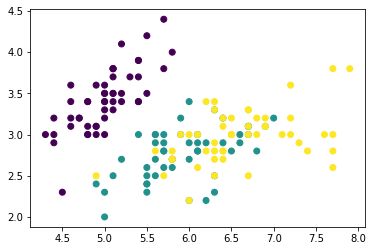

In [3]:
plt.scatter(x0, x1, c=y)
plt.show()

## Train the Classifier
Next, we'll train the KNN classifier using scikit-learn. 

Set the number of neighbors:

In [4]:
# set main parameters for KNN plot
N_NEIGHBORS = 15 # KNN number of neighbors

Implement and fit the KNN classifier:

In [5]:
clf = neighbors.KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
clf.fit(x, y)

KNeighborsClassifier(n_neighbors=15)

## Define the Plot-Bounds and the Meshgrid
We need to define the min/max values for the plot. In addition, we'll create the mesh-grid, which will be used to show the probability of the class at a specific point.

Find the min/max points for both the `x0` and `x1` features. These will be used to set the bounds for the plot.

In [6]:
PAD = 1.0 # how much to "pad" around the min/max values. helps in setting bounds of plot

x0_min, x0_max = np.round(x0.min())-PAD, np.round(x0.max()+PAD)
x1_min, x1_max = np.round(x1.min())-PAD, np.round(x1.max()+PAD)

Create the 1D arrays representing the range of probability data points on both the axes:

In [7]:
H = 0.1 # mesh stepsize

x0_axis_range = np.arange(x0_min,x0_max, H)
x1_axis_range = np.arange(x1_min,x1_max, H)

Create the meshgrid:

In [8]:
xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)

# check the shape of the meshgrid
print('xx0.shape:', xx0.shape)
print('xx1.shape:', xx1.shape)

xx0.shape: (40, 60)
xx1.shape: (40, 60)


Meshgrid can be confusing -- read this [stackoverflow explanation](https://stackoverflow.com/a/36014586/9214620) for a good summary. Essentially, to create a rectangular gride, we need every combination of the `x0` and `x1` points.

We can plot the two outputs, `xx0` and `xx1`, together to visualize the grid

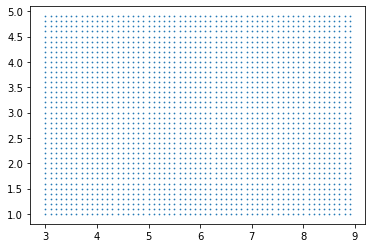

In [9]:
plt.scatter(xx0, xx1, s=0.5)
plt.show()

I like to have the shape of the meshgrid (the $xx$'s) put into the same dimensional format as the original $x$. The shape will then be: `[no_dots, no_dimensions]`

In [10]:
xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))
print('xx.shape:', xx.shape)

xx.shape: (2400, 2)


# Making Predictions
We can now make predictions for all the little dots. The `yy_size` will be used to create the size of the dots.

In [11]:
# prediction of all the little dots
yy_hat = clf.predict(xx) 

# probability of each dot beingthe predicted color
yy_prob = clf.predict_proba(xx) 
                               
# the size of each probability dot
yy_size = np.max(yy_prob, axis=1) 

# Figure

We can make the figure!

We'll define some of the basic parameter variables:

In [12]:
PROB_DOT_SCALE = 40 # modifier to scale the probability dots
PROB_DOT_SCALE_POWER = 3 # exponential used to increase/decrease size of prob dots
TRUE_DOT_SIZE = 50 # size of the true labels

... and plot! I've extensively commented this code, so I won't be providing anymore commentary.

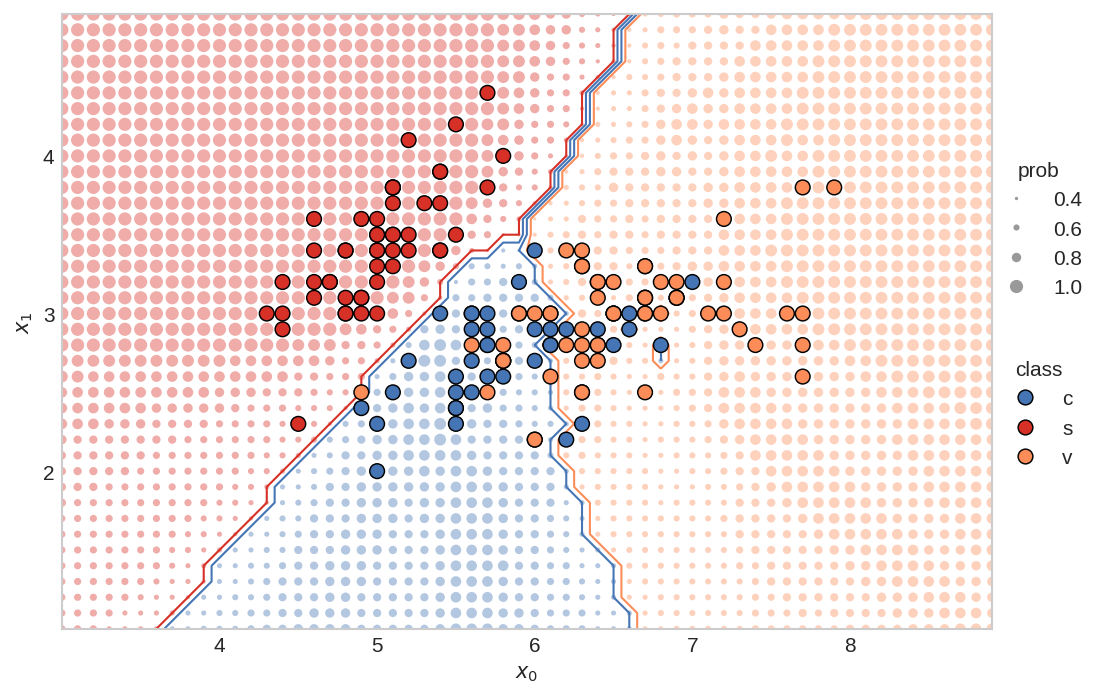

In [13]:
from matplotlib.ticker import MaxNLocator # needed for integer only on axis
from matplotlib.lines import Line2D # for creating the custom legend

# make figure
plt.style.use('seaborn-whitegrid') # set style because it looks nice
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=150)

# establish colors and colormap
#  * color blind colors, from https://bit.ly/3qJ6LYL
redish = '#d73027'
orangeish = '#fc8d59'
yellowish = '#fee090'
blueish = '#4575b4'
colormap = np.array([redish,blueish,orangeish])

# plot all the little dots, position defined by the xx values, color
# defined by the knn predictions (yy_hat), and size defined by the 
# probability of that color (yy_prob)
# * because the yy_hat values are either 0, 1, 2, we can use 
#   these as values to index into the colormap array
# * size of dots (the probability) increases exponentially (^3), so that there is
#   a nice difference between different probabilities. I'm sure there is a more
#   elegant way to do this though...
# * linewidths=0 so that there are no "edges" around the dots
ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.4, 
           s=PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER, linewidths=0,)

# plot the contours
# * we have to reshape the yy_hat to get it into a 
#   2D dimensional format, representing both the x0
#   and x1 axis
# * the number of levels and color scheme was manually tuned
#   to make sense for this data. Would probably change, for 
#   instance, if there were 4, or 5 (etc.) classes
ax.contour(x0_axis_range, x1_axis_range, 
           np.reshape(yy_hat,(xx0.shape[0],-1)), 
           levels=3, linewidths=1, 
           colors=[redish,blueish, blueish,orangeish,])

# plot the original x values.
# * zorder is 3 so that the dots appear above all the other dots 
ax.scatter(x[:,0], x[:,1], c=colormap[y], s=TRUE_DOT_SIZE, zorder=3, linewidths=0.7, edgecolor='k')

# create legends
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")

# create class legend
# Line2D properties: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
# about size of scatter plot points: https://stackoverflow.com/a/47403507/9214620
legend_class = []
for flower_class, color in zip(['c', 's', 'v'], [blueish, redish, orangeish]):
    legend_class.append(Line2D([0], [0], marker='o', label=flower_class,ls='None',
                               markerfacecolor=color, markersize=np.sqrt(TRUE_DOT_SIZE), 
                               markeredgecolor='k', markeredgewidth=0.7))

# iterate over each of the probabilities to create prob legend
prob_values = [0.4, 0.6, 0.8, 1.0]
legend_prob = []
for prob in prob_values:
    legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                              markerfacecolor='grey', 
                              markersize=np.sqrt(PROB_DOT_SCALE*prob**PROB_DOT_SCALE_POWER), 
                              markeredgecolor='k', markeredgewidth=0))



legend1 = ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.05, 0.35),
                    frameon=False, title='class')

legend2 = ax.legend(handles=legend_prob, loc='center', 
                    bbox_to_anchor=(1.05, 0.65),
                    frameon=False, title='prob', )

ax.add_artist(legend1) # add legend back after it disappears

ax.set_yticks(np.arange(x1_min,x1_max, 1)) # I don't like the decimals
ax.grid(False) # remove gridlines (inherited from 'seaborn-whitegrid' style)

# only use integers for axis tick labels
# from: https://stackoverflow.com/a/34880501/9214620
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# remove first ticks from axis labels, for looks
# from: https://stackoverflow.com/a/19503828/9214620
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_yticks(np.arange(x1_min,x1_max, 1)[1:])

# set the aspect ratio to 1, for looks
ax.set_aspect(1)

# plt.savefig('knn.svg',dpi=300,format='svg', bbox_inches = "tight")
# plt.savefig('knn.png',dpi=300,bbox_inches = "tight")
plt.show()

# Putting it All Together
For compactness, here's the whole thing in one code chunk. Of course, one could turn into into a function... I'll leave that to you.

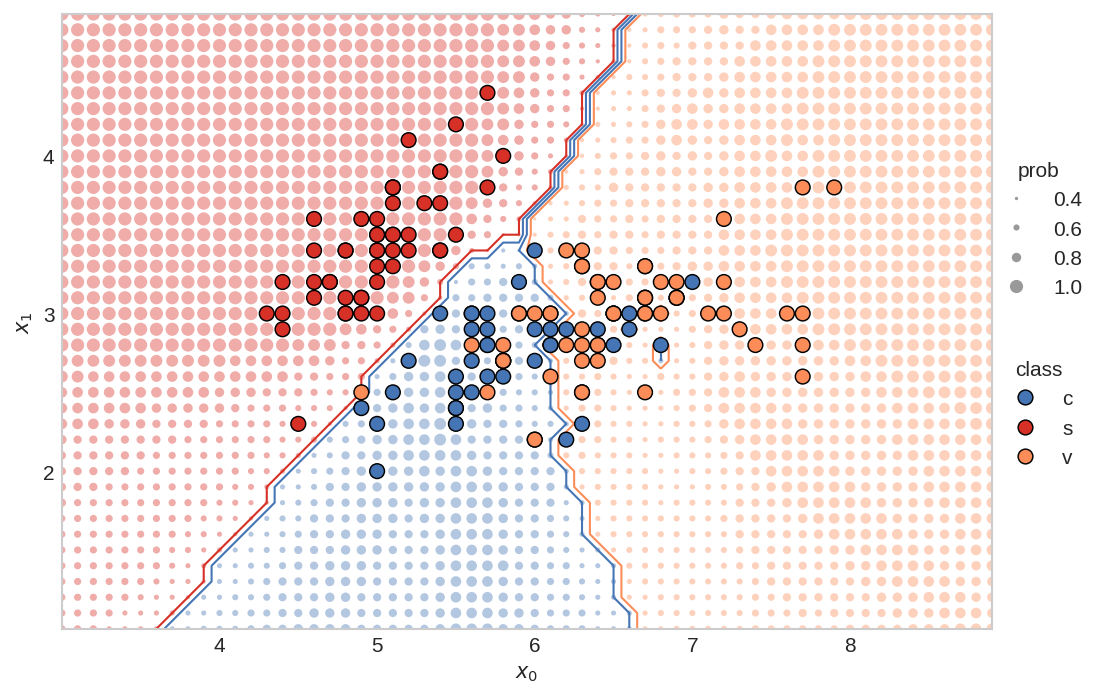

In [14]:
# set main parameters for KNN plot
N_NEIGHBORS = 15 # KNN number of neighbors
H = 0.1 # mesh stepsize
PROB_DOT_SCALE = 40 # modifier to scale the probability dots
PROB_DOT_SCALE_POWER = 3 # exponential used to increase/decrease size of prob dots
TRUE_DOT_SIZE = 50 # size of the true labels
PAD = 1.0 # how much to "pad" around the true labels

clf = neighbors.KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
clf.fit(x, y)

x0_min, x0_max = np.round(x0.min())-PAD, np.round(x0.max()+PAD)
x1_min, x1_max = np.round(x1.min())-PAD, np.round(x1.max()+PAD)

# create 1D arrays representing the range of probability data points
x0_axis_range = np.arange(x0_min,x0_max, H)
x1_axis_range = np.arange(x1_min,x1_max, H)

# create meshgrid between the two axis ranges
xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)

# put the xx in the same dimensional format as the original x
xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))

yy_hat = clf.predict(xx) # prediction of all the little dots
yy_prob = clf.predict_proba(xx) # probability of each dot being 
                                # the predicted color
yy_size = np.max(yy_prob, axis=1)

# make figure
plt.style.use('seaborn-whitegrid') # set style because it looks nice
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=150)

# establish colors and colormap
redish = '#d73027'
orangeish = '#fc8d59'
yellowish = '#fee090'
blueish = '#4575b4'
colormap = np.array([redish,blueish,orangeish])

# plot all the little dots
ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.4, s=PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER, linewidths=0,)

# plot the contours
ax.contour(x0_axis_range, x1_axis_range, 
           np.reshape(yy_hat,(xx0.shape[0],-1)), 
           levels=3, linewidths=1, 
           colors=[redish,blueish, blueish,orangeish,])

# plot the original x values.
ax.scatter(x[:,0], x[:,1], c=colormap[y], s=TRUE_DOT_SIZE, zorder=3, linewidths=0.7, edgecolor='k')

# create legends
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")

# set the aspect ratio to 1, for looks
ax.set_aspect(1)

# create class legend
legend_class = []
for flower_class, color in zip(['c', 's', 'v'], [blueish, redish, orangeish]):
    legend_class.append(Line2D([0], [0], marker='o', label=flower_class,ls='None',
                               markerfacecolor=color, markersize=np.sqrt(TRUE_DOT_SIZE), 
                               markeredgecolor='k', markeredgewidth=0.7))

# iterate over each of the probabilities to create prob legend
prob_values = [0.4, 0.6, 0.8, 1.0]
legend_prob = []
for prob in prob_values:
    legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                              markerfacecolor='grey', 
                              markersize=np.sqrt(PROB_DOT_SCALE*prob**PROB_DOT_SCALE_POWER), 
                              markeredgecolor='k', markeredgewidth=0))


legend1 = ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.05, 0.35),
                    frameon=False, title='class')

legend2 = ax.legend(handles=legend_prob, loc='center', 
                    bbox_to_anchor=(1.05, 0.65),
                    frameon=False, title='prob', )

ax.add_artist(legend1) # add legend back after it disappears

ax.set_yticks(np.arange(x1_min,x1_max, 1)) # I don't like the decimals
ax.grid(False) # remove gridlines (inherited from 'seaborn-whitegrid' style)

# only use integers for axis tick labels
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# remove first ticks from axis labels, for looks
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_yticks(np.arange(x1_min,x1_max, 1)[1:])

plt.show()

# Conclusion
I hope you've found this little blog post useful. As I come across other beautiful plots, I'll post them here. So with that:

<div style="text-align: center; ">
<figure>
  <img src="./img/i_like_the_plot_meme.jpg" alt="I like the plot meme" style="background:none; border:none; box-shadow:none; text-align:center" width="700px"/>
</figure>
</div>